# Simple RNN (Many - to - one)

## Sine wave time series predicting

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['font.size'] = 10
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
s = np.sin(2 * np.pi / 8. * np.arange(20))
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


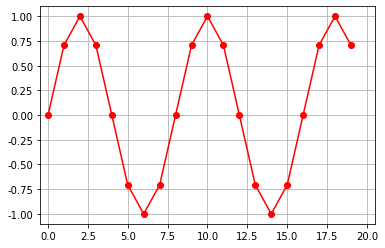

In [3]:
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

### Transfering original time series vector to Toeplitz array

In [4]:
from scipy.linalg import toeplitz

S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0]-2)], s[::-1]))
S[:3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  1.22464680e-16, -7.07106781e-01,
        -1.00000000e+00, -7.07106781e-01, -2.44929360e-16,
         7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,
         1.00000000e+00,  7.07106781e-01],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
         1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
        -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,
         1.00000000e+00,  7.07106781e-01,  3.67394040e-16,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  0.00000000e+00],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16,
        -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
        -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
         7.07106781e-01,  3.6

In [5]:
S.shape

(19, 20)

In [6]:
X_train = S[: -1, :3][:, :, np.newaxis]
y_train = S[: -1, 3]
X_train.shape, y_train.shape

((18, 3, 1), (18,))

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


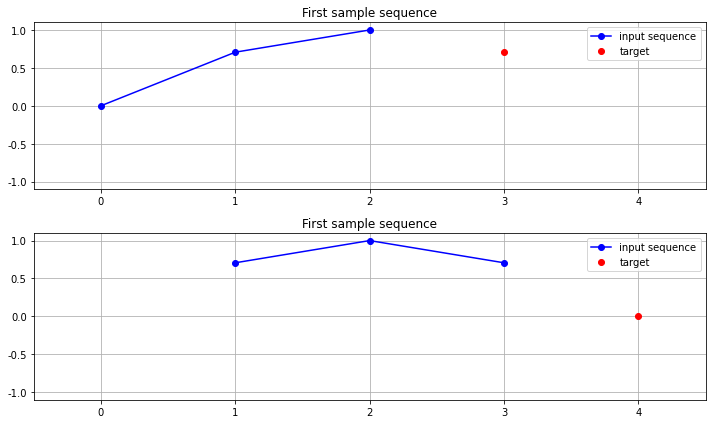

In [7]:
plt.figure(figsize = (10, 6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label = 'input sequence')
plt.plot([3], y_train[0], 'ro', label = 'target')
plt.xlim(-0.5, 4.5); plt.ylim(-1.1, 1.1)
plt.grid(); plt.legend(); plt.title('First sample sequence')

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label = 'input sequence')
plt.plot([4], y_train[1], 'ro', label = 'target')
plt.xlim(-0.5, 4.5); plt.ylim(-1.1, 1.1)
plt.grid(); plt.legend(); plt.title('First sample sequence')

plt.tight_layout()
plt.show()

### Defining Recurrent Neural Network

In [8]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [10]:
model = Sequential([
    SimpleRNN(10, input_shape = X_train.shape[1:], activation = 'tanh'),
    Dense(1, activation = 'linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = 'adam', loss = 'mse')

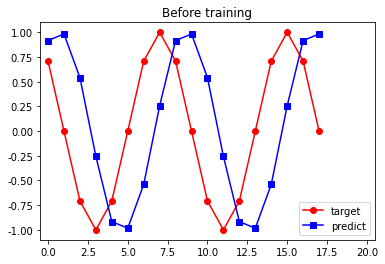

In [12]:
plt.plot(y_train, 'ro-', label = 'target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label = 'predict')
plt.xlim(-0.5, 20.5); plt.ylim(-1.1, 1.1)
plt.legend(); plt.title('Before training')
plt.show()

### Learning model

In [13]:
history = model.fit(X_train, y_train, epochs = 100, verbose = 0)

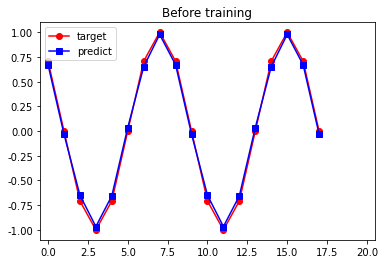

In [14]:
plt.plot(y_train, 'ro-', label = 'target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label = 'predict')
plt.xlim(-0.5, 20.5); plt.ylim(-1.1, 1.1)
plt.legend(); plt.title('Before training')
plt.show()

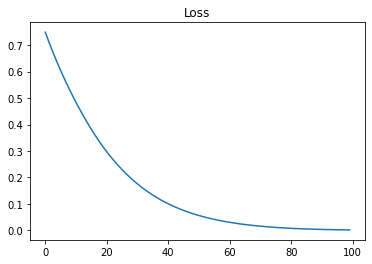

In [15]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()